## Session 1: HPC and the Julia Framework

<br> \textbf{OBJECTIVE: Confirm Julia framework and Base speed}
<br> •  KR1: Use @code_* to examine a simple function. The * is replaceable by native, typed, warntype, and others. Discover them.
<br> •  KR2: Demonstrate that Julia is able to determine constants in codes.
<br> •  KR3: Demonstrate Julia's type-inference and multiple dispatch.
<br> •  KR4: Show the difference, if any, between your own sum function my_sum(x::Vector) and @time. Use a for-loop for your customized sum function.
<br> •  KR5: Replicate plotting the Mandelbrot. Use a separate file Mandelbrot.jl to contain the function code. Use include() function to load the file.
<br> •  KR6: Plot of the time it takes for the function to run using @time macro for the given grid size n.
<br> •  KR7: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best @time output to use for this?

This is my first time to formally evaluate the high performance computing capability of any coding language. Also, I am hoping to go around and discover how the general framework for Julia functions.

### KR1


\textbf{Use @code_* to examine a simple function. The * is replaceable by native, typed, warntype, and others. Discover them.}

To familiaize how these code examiners, first let's request for the documentation of the said commands: `@code_native`, `@code_typed`,`@code_warntype`, and for the interest of the next KR, `@code_llvm`.

In [1]:
function fib(n)
    x, y = 0,1
    while x < n
        x, y = y, x+y
        #println(x)
    end
    return(y)    
end

fib (generic function with 1 method)

In [2]:
fib(3)

5

### `@code_lowered`

In [3]:
?@code_lowered

```
@code_lowered
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_lowered`](@ref) on the resulting expression.


In [4]:
@code_lowered fib(143)

CodeInfo(
1 ─      x = 0
└──      y = 1
2 ┄ %3 = x < n
└──      goto #4 if not %3
3 ─ %5 = y
│   %6 = x + y
│        x = %5
│        y = %6
└──      goto #2
4 ─      return y
)

In [5]:
@code_lowered 14^3

CodeInfo(
1 ─ %1 = Base.power_by_squaring(x, p)
└──      return %1
)

In [6]:
@code_lowered 14.0^(3.0)

CodeInfo(
1 ─       nothing
│   %2  = Base.cconvert(Base.Math.Float64, x)
│   %3  = Base.cconvert(Base.Math.Float64, y)
│   %4  = Base.unsafe_convert(Base.Math.Float64, %2)
│   %5  = Base.unsafe_convert(Base.Math.Float64, %3)
│         z = $(Expr(:foreigncall, "llvm.pow.f64", Float64, svec(Float64, Float64), 0, :(:llvmcall), :(%4), :(%5), :(%3), :(%2)))
│   %7  = Base.Math.isnan(z)
│   %8  = x + y
│   %9  = Base.Math.isnan(%8)
│   %10 = !%9
│   %11 = %7 & %10
└──       goto #3 if not %11
2 ─       Base.Math.throw_exp_domainerror(x)
3 ┄       return z
)

### `@code_native`

In [7]:
?@code_native

```
@code_native
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_native`](@ref) on the resulting expression.

Set the optional keyword argument `debuginfo` by putting it before the function call, like this:

```
@code_native debuginfo=:default f(x)
```

`debuginfo` may be one of `:source` (default) or `:none`, to specify the verbosity of code comments.


In [8]:
@code_native fib(143)

	.text
; ┌ @ In[1]:1 within `fib'
	pushq	%rbp
	movq	%rsp, %rbp
	movl	$1, %r8d
	xorl	%eax, %eax
	nopl	(%rax)
L16:
	movq	%rax, %rdx
	movq	%r8, %rax
; │ @ In[1]:4 within `fib'
; │┌ @ int.jl:87 within `+'
	leaq	(%rdx,%rax), %r8
; │└
; │ @ In[1]:3 within `fib'
; │┌ @ int.jl:83 within `<'
	cmpq	%rcx, %rdx
; │└
	jl	L16
; │ @ In[1]:7 within `fib'
	popq	%rbp
	retq
	nopw	%cs:(%rax,%rax)
; └


In [9]:
@code_native 14^3

	.text
; ┌ @ intfuncs.jl:290 within `^'
	pushq	%rbp
	movq	%rsp, %rbp
	subq	$32, %rsp
	movabsq	$power_by_squaring, %rax
	callq	*%rax
	addq	$32, %rsp
	popq	%rbp
	retq
	nopw	(%rax,%rax)
; └


In [10]:
@code_native 14.0^(3.0)

	.text
; ┌ @ math.jl:898 within `^'
	pushq	%rbp
	movq	%rsp, %rbp
	subq	$64, %rsp
	vmovaps	%xmm7, -16(%rbp)
	vmovaps	%xmm6, -32(%rbp)
	vmovapd	%xmm1, %xmm7
	vmovapd	%xmm0, %xmm6
	movabsq	$pow, %rax
; │ @ math.jl:899 within `^'
	vmovapd	%xmm6, %xmm0
	vmovapd	%xmm7, %xmm1
	callq	*%rax
; │ @ math.jl:900 within `^'
; │┌ @ float.jl:449 within `isnan'
; ││┌ @ float.jl:368 within `!='
	vucomisd	%xmm0, %xmm0
; │└└
	jnp	L62
; │ @ math.jl within `^'
	vaddsd	%xmm7, %xmm6, %xmm1
; │ @ math.jl:900 within `^'
	vucomisd	%xmm1, %xmm1
	jnp	L78
; │ @ math.jl within `^'
L62:
	vmovaps	-32(%rbp), %xmm6
	vmovaps	-16(%rbp), %xmm7
; │ @ math.jl:903 within `^'
	addq	$64, %rsp
	popq	%rbp
	retq
; │ @ math.jl:901 within `^'
L78:
	movabsq	$throw_exp_domainerror, %rax
	vmovapd	%xmm6, %xmm0
	callq	*%rax
	ud2
; └


### `@code_typed`

In [11]:
?@code_typed

```
@code_typed
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_typed`](@ref) on the resulting expression. Use the optional argument `optimize` with

```
@code_typed optimize=true foo(x)
```

to control whether additional optimizations, such as inlining, are also applied.


In [12]:
@code_typed fib(143)

CodeInfo(
1 ─      nothing::Nothing
2 ┄ %2 = φ (#1 => 1, #3 => %6)::Int64
│   %3 = φ (#1 => 0, #3 => %2)::Int64
│   %4 = Base.slt_int(%3, n)::Bool
└──      goto #4 if not %4
3 ─ %6 = Base.add_int(%3, %2)::Int64
└──      goto #2
4 ─      return %2
) => Int64

In [13]:
@code_typed 14^3

CodeInfo(
1 ─ %1 = invoke Base.power_by_squaring(_2::Int64, _3::Int64)::Int64
└──      return %1
) => Int64

In [14]:
@code_typed 14.0^(3.0)

CodeInfo(
1 ─ %1 = $(Expr(:foreigncall, "llvm.pow.f64", Float64, svec(Float64, Float64), 0, :(:llvmcall), Core.Argument(2), Core.Argument(3), Core.Argument(3), Core.Argument(2)))::Float64
│   %2 = Base.ne_float(%1, %1)::Bool
│   %3 = Base.add_float(x, y)::Float64
│   %4 = Base.ne_float(%3, %3)::Bool
│   %5 = Base.not_int(%4)::Bool
│   %6 = Base.and_int(%2, %5)::Bool
└──      goto #3 if not %6
2 ─      invoke Base.Math.throw_exp_domainerror(_2::Float64)::Union{}
└──      unreachable
3 ─      return %1
) => Float64

### `@code_warntype`

In [15]:
?@code_warntype

```
@code_warntype
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_warntype`](@ref) on the resulting expression.


In [16]:
@code_warntype fib(143)

Variables
  #self#::Core.Const(fib)
  n::Int64
  y::Int64
  x::Int64

Body::Int64
1 ─      (x = 0)
└──      (y = 1)
2 ┄ %3 = (x < n)::Bool
└──      goto #4 if not %3
3 ─ %5 = y::Int64
│   %6 = (x + y)::Int64
│        (x = %5)
│        (y = %6)
└──      goto #2
4 ─      return y


In [17]:
@code_warntype 14^3

Variables
  #self#::Core.Const(^)
  x::Int64
  p::Int64

Body::Int64
1 ─ %1 = Base.power_by_squaring(x, p)::Int64
└──      return %1


In [18]:
@code_warntype 14.0^(3.0)

Variables
  #self#::Core.Const(^)
  x::Float64
  y::Float64
  z::Float64

Body::Float64
1 ─       nothing
│   %2  = Base.cconvert(Base.Math.Float64, x)::Float64
│   %3  = Base.cconvert(Base.Math.Float64, y)::Float64
│   %4  = Base.unsafe_convert(Base.Math.Float64, %2)::Float64
│   %5  = Base.unsafe_convert(Base.Math.Float64, %3)::Float64
│         (z = $(Expr(:foreigncall, "llvm.pow.f64", Float64, svec(Float64, Float64), 0, :(:llvmcall), :(%4), :(%5), :(%3), :(%2))))
│   %7  = Base.Math.isnan(z)::Bool
│   %8  = (x + y)::Float64
│   %9  = Base.Math.isnan(%8)::Bool
│   %10 = !%9::Bool
│   %11 = (%7 & %10)::Bool
└──       goto #3 if not %11
2 ─       Base.Math.throw_exp_domainerror(x)
3 ┄       return z


### `@code_llvm`

In [19]:
?code_llvm

search: code_llvm @code_llvm



```
code_llvm([io=stdout,], f, types; raw=false, dump_module=false, optimize=true, debuginfo=:default)
```

Prints the LLVM bitcodes generated for running the method matching the given generic function and type signature to `io`.

If the `optimize` keyword is unset, the code will be shown before LLVM optimizations. All metadata and dbg.* calls are removed from the printed bitcode. For the full IR, set the `raw` keyword to true. To dump the entire module that encapsulates the function (with declarations), set the `dump_module` keyword to true. Keyword argument `debuginfo` may be one of source (default) or none, to specify the verbosity of code comments.


In [20]:
@code_llvm fib(143)

;  @ In[1]:1 within `fib'
; Function Attrs: uwtable
define i64 @julia_fib_2208(i64 signext %0) #0 {
top:
  br label %L2

L2:                                               ; preds = %L2, %top
  %value_phi = phi i64 [ 1, %top ], [ %1, %L2 ]
  %value_phi1 = phi i64 [ 0, %top ], [ %value_phi, %L2 ]
;  @ In[1]:3 within `fib'
; ┌ @ int.jl:83 within `<'
   %.not = icmp slt i64 %value_phi1, %0
; └
;  @ In[1]:4 within `fib'
; ┌ @ int.jl:87 within `+'
   %1 = add i64 %value_phi1, %value_phi
; └
;  @ In[1]:3 within `fib'
  br i1 %.not, label %L2, label %L8

L8:                                               ; preds = %L2
;  @ In[1]:7 within `fib'
  ret i64 %value_phi
}


In [21]:
@code_llvm 14^3

;  @ intfuncs.jl:290 within `^'
; Function Attrs: uwtable
define i64 @"julia_^_2221"(i64 signext %0, i64 signext %1) #0 {
top:
  %2 = call i64 @j_power_by_squaring_2223(i64 signext %0, i64 signext %1) #0
  ret i64 %2
}


In [22]:
@code_llvm 14.0^(3.0)

;  @ math.jl:898 within `^'
; Function Attrs: uwtable
define double @"julia_^_2224"(double %0, double %1) #0 {
top:
;  @ math.jl:899 within `^'
  %2 = call double @llvm.pow.f64(double %0, double %1)
;  @ math.jl:900 within `^'
; ┌ @ float.jl:449 within `isnan'
; │┌ @ float.jl:368 within `!='
    %3 = fcmp ord double %2, 0.000000e+00
; └└
; ┌ @ float.jl:326 within `+'
   %4 = fadd double %0, %1
; └
; ┌ @ float.jl:449 within `isnan'
; │┌ @ float.jl:368 within `!='
    %5 = fcmp uno double %4, 0.000000e+00
; └└
  %6 = or i1 %3, %5
  br i1 %6, label %L10, label %L8

L8:                                               ; preds = %top
;  @ math.jl:901 within `^'
  %7 = call nonnull {}* @j_throw_exp_domainerror_2226(double %0) #0
  call void @llvm.trap()
  unreachable

L10:                                              ; preds = %top
;  @ math.jl:903 within `^'
  ret double %2
}


## KR2

\textbf{Demonstrate that Julia is able to determine constants in codes.}

In [23]:
@code_warntype 14^pi

Variables
  #self#::Core.Const(^)
  x::Int64
  y::Core.Const(π)

Body::Float64
1 ─ %1 = Base.promote(x, y)::Core.PartialStruct(Tuple{Float64, Float64}, Any[Float64, Core.Const(3.141592653589793)])
│   %2 = Core._apply_iterate(Base.iterate, Base.:^, %1)::Float64
└──      return %2


In [24]:
f(x) = log(10.0)*x

f (generic function with 1 method)

In [25]:
@code_llvm f(4.0)

;  @ In[24]:1 within `f'
; Function Attrs: uwtable
define double @julia_f_2281(double %0) #0 {
top:
; ┌ @ float.jl:332 within `*'
   %1 = fmul double %0, 0x40026BB1BBB55516
; └
  ret double %1
}


This `   %1 = fmul double %0, 0x40026BB1BBB55516` represents the operation carried out by f(x) and `0x40026BB1BBB55516` is like a reference code of the constant `log(10.0)`. Instead of performing the log operation, it just finds the value from it's database. In short, Julia is able to know where are the constants in our code and apply it to reduce the number of operations.

In [26]:
g(x) = x*log(x)

g (generic function with 1 method)

In [27]:
@code_llvm g(4.0)

;  @ In[26]:1 within `g'
; Function Attrs: uwtable
define double @julia_g_2307(double %0) #0 {
top:
  %1 = call double @j_log_2309(double %0) #0
; ┌ @ float.jl:332 within `*'
   %2 = fmul double %1, %0
; └
  ret double %2
}


In this particular function where constant is non-existent, Julia is forced to call the log operation as indicated by `  %1 = call double @j_log_2551(double %0) #0` before it executes the multiplication operation.

## KR3

\textbf{Demonstrate Julia's type-inference and multiple dispatch.}


In this portion, we explore functions and methods, on how to create them and how they are used. Before creating one, it's better to check if the function already exists so that we can avoid overloading existing functions. For example, is there an existing function called `permute`?

In [28]:
?permute

search: permute! permutedims permutedims! PermutedDimsArray invpermute!

Couldn't find permute
Perhaps you meant permute!, promote or permutedims


No documentation found.

Binding `permute` does not exist.


If there isn't or the function you queried is slightly incorrect, Julia's help mode will give you suggestions. On my query `?permute`, my syntax is incorrect hence it suggested the following alternatives: `permute! permutedims permutedims! PermutedDimsArray invpermute!`.

In [29]:
?permute!;

In [30]:
permute!([1, 1, 3, 4],[2, 4, 3, 1]) 

4-element Vector{Int64}:
 1
 4
 3
 1

If a function that we deem doesn't exist, then we can define a general one along with the specialized methods. From the discussion, shown below is an example on how to set up a custom function.

In [31]:
what(x) = "some type $(typeof(x))"
what(x::String) = "a string"
what(x::Number) = "a number"
what(x::Real) = "a real number"
what(x::Rational) = "a rational number"
what(x::Int) = "an integer"
what(x::Complex) = "a complex number"

what (generic function with 7 methods)

In [32]:
?what

search: what Cwchar_t



No documentation found.

`what` is a `Function`.

```
# 7 methods for generic function "what":
[1] what(x::String) in Main at In[31]:2
[2] what(x::Rational) in Main at In[31]:5
[3] what(x::Int64) in Main at In[31]:6
[4] what(x::Real) in Main at In[31]:4
[5] what(x::Complex) in Main at In[31]:7
[6] what(x::Number) in Main at In[31]:3
[7] what(x) in Main at In[31]:1
```


It essentially demonstrates how Julia is aware of the type of a given input, hence "type-inference". In the function crafted, different inputs correspond to difference outputs but it is contained in a singular function. When called, it decipheres the type of the input as shown by some demonstrations below. This practicaly demosntrates Julia's multiple dispatch and it is one of Julia's edge over most languages which has a single-dispatch polymorphism.

In [33]:
println("4.0 is $(what(4.0)).")
println("4+2im is $(what(4+2im)).")
println("4 is $(what(4)).")


4.0 is a real number.
4+2im is a complex number.
4 is an integer.


## KR4

\textbf{ Show the difference, if any, between your own sum function my_sum(x::Vector) and @time. Use a for-loop for your customized sum function.}

Shown below is a customized sum function `my_sum(::Vector)` demonstrated during class. It is a custom function which basically sums up the given elements of an input vector. In this portion, the performance of this custom sum function will be compared to the default summing function of julia. We will implement `@timed` to extract and save the runtime values.

In [34]:
using Plots

### `my_sum(x::Vector)`

In [35]:
function my_sum(x::Vector)
    s = zero(eltype(x))
    for el in x
        s += el
    end
    return s
end

my_sum (generic function with 1 method)

In [36]:
x = rand(10_000_000);

In [37]:
#@time my_sum(x)

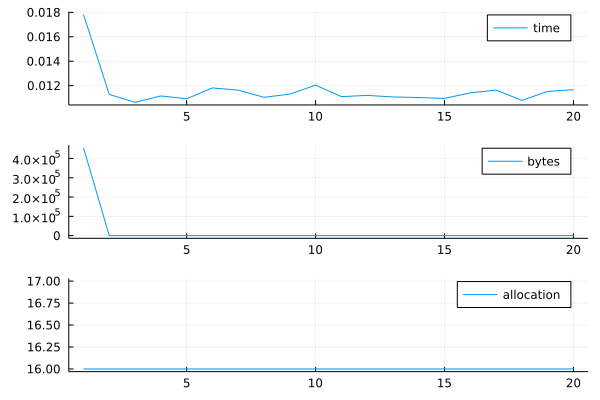

In [38]:
time = []
bytes = []
allocation = []
for i in range(1,stop=20)
    stats, alloc = @timed(my_sum(x)), @allocated(my_sum(x))
    append!(time, stats.time)
    append!(bytes, stats.bytes)
    append!(allocation, alloc)
    
end

p1 = plot(time, label="time")
p2 = plot(bytes, label="bytes")
p3 = plot(allocation, label="allocation")
plot(p1,p2,p3, layout = (3, 1))#; plot!(bytes, label = "bytes")

### `sum(::AbstractArray)`

In [39]:
?sum(::AbstractArray)

```
sum(itr; [init])
```

Returns the sum of all elements in a collection.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

The value returned for empty `itr` can be specified by `init`. It must be the additive identity (i.e. zero) as it is unspecified whether `init` is used for non-empty collections.

!!! compat "Julia 1.6"
    Keyword argument `init` requires Julia 1.6 or later.


# Examples

```jldoctest
julia> sum(1:20)
210

julia> sum(1:20; init = 0.0)
210.0
```

---

```
sum(A::AbstractArray; dims)
```

Sum elements of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> sum(A, dims=1)
1×2 Matrix{Int64}:
 4  6

julia> sum(A, dims=2)
2×1 Matrix{Int64}:
 3
 7
```


In [40]:
#@time sum(x,init = 0.0)

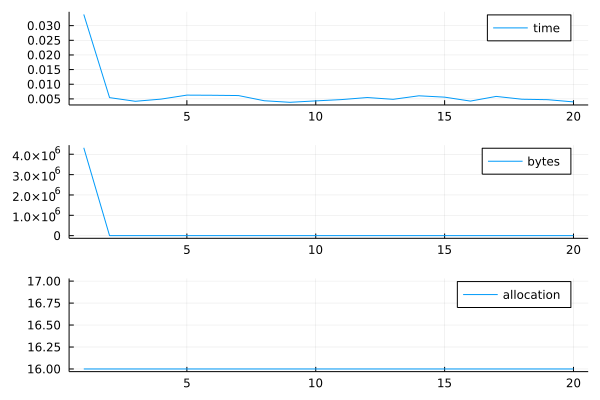

In [41]:
time_2 = []
bytes_2 = []
allocation_2 = []
for i in range(1,stop=20)
    stats, alloc = @timed(sum(x)), @allocated(sum(x))
    append!(time_2, stats.time)
    append!(bytes_2, stats.bytes)
    append!(allocation_2, alloc)
    
end

p1_2 = plot(time_2, label="time")
p2_2 = plot(bytes_2, label="bytes")
p3_2 = plot(allocation_2, label="allocation")
plot(p1_2,p2_2,p3_2, layout = (3, 1))#; plot!(bytes, label = "bytes")

In [42]:
println("The default sum fuction is $(time_2[1]/time[1])x faster than the custom sum function.")

The default sum fuction is 1.896911842238101x faster than the custom sum function.


In [43]:
println("Implementing the custom sum function the second time around makes the operation $(time[1]/time[2])x faster.")

Implementing the custom sum function the second time around makes the operation 1.5810410570187106x faster.


In [44]:
println("Implementing the default sum function the second time around makes the operation $(time_2[1]/time_2[2])x faster.")

Implementing the default sum function the second time around makes the operation 6.230114578344325x faster.


## KR5

In [45]:
include("Mandelbrot.jl")

mandelbrot

In [46]:
?mandelbrot

search: mandelbrot



```
mandelbrot( c )
```

Computes the number of evaluations of the following equation before the resulting complex number 'z' beginning with 'z=c'.

  * Input: 'c::Number'
  * Output: 'itrMax::??'

### Questions

  * What do you think is the output type of this function?
  * WHich of the part of the code determines the type?

Sometimes forcing the type of output can be an advantage.


In [47]:
include("PlotMandelbrot.jl")

plotMandelbrot (generic function with 2 methods)

In [48]:
?plotMandelbrot

search: plotMandelbrot



No documentation found.

`plotMandelbrot` is a `Function`.

```
# 2 methods for generic function "plotMandelbrot":
[1] plotMandelbrot(vrange::Tuple{Float64, Float64}; n) in Main at C:\Users\renep\Google Drive\MS Physics\2.1\Physics 215 - Julia\PlotMandelbrot.jl:16
[2] plotMandelbrot(xrange::Tuple{Float64, Float64}, yrange::Tuple{Float64, Float64}; n) in Main at C:\Users\renep\Google Drive\MS Physics\2.1\Physics 215 - Julia\PlotMandelbrot.jl:2
```


In [49]:
using Plots

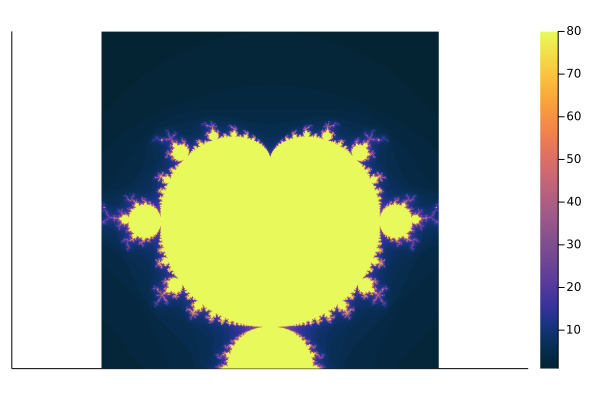

In [50]:
plotMandelbrot( (-1.0,1.0); n=1_000 )

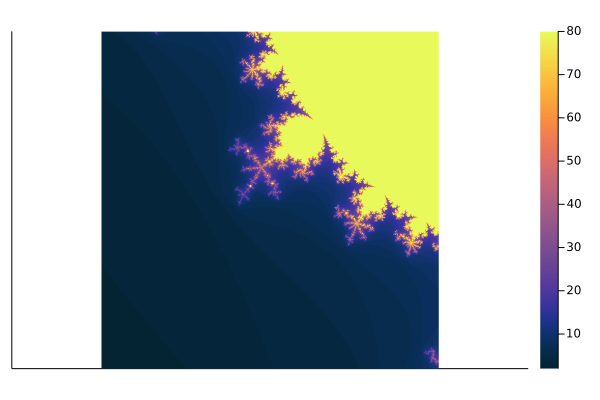

In [51]:
plotMandelbrot( (-0.95,-0.3); n=1_000 )

## KR6

\textbf{Plot of the time it takes for the function to run using @time macro for the given grid size n.}


  0.386325 seconds (5.29 k allocations: 15.532 MiB)


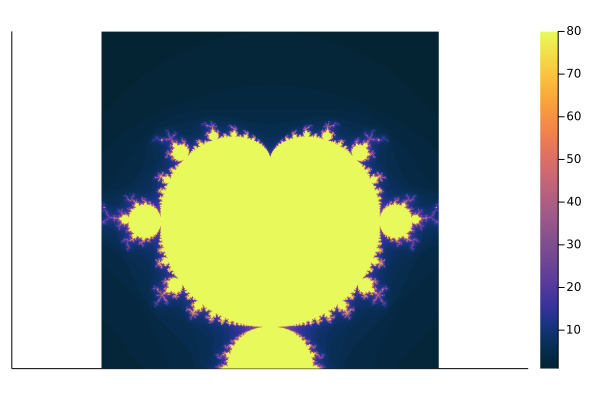

In [52]:
@time plotMandelbrot( (-1.0,1.0); n=1_000 )

  0.006949 seconds (1.69 k allocations: 280.945 KiB)


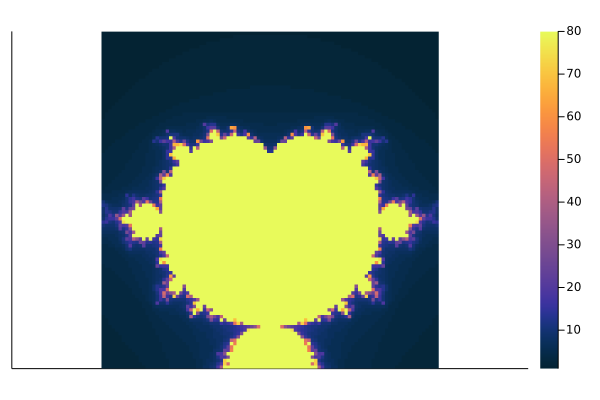

In [53]:
@time plotMandelbrot( (-1.0,1.0); n=1_00 )

  0.000983 seconds (1.32 k allocations: 110.664 KiB)


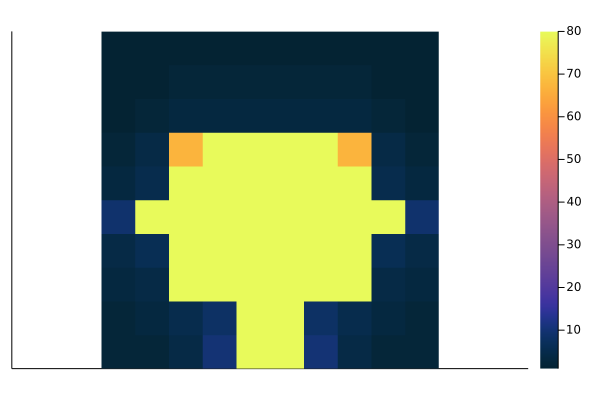

In [54]:
@time plotMandelbrot( (-1.0,1.0); n=1_0 )

## KR7

\textbf{Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best @time output to use for this?}

In [55]:
iter = 200
time = zeros(iter)
n_list = range(10, length = iter, step=10)
for i in range(1, stop = iter)
    tt = @timed plotMandelbrot( (-1.0,1.0); n=n_list[i] )
    time[i] = tt[2]
end

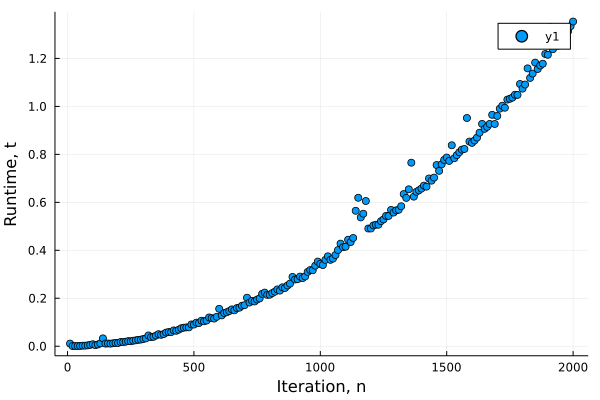

In [56]:
plot(n_list, time, 
    seriestype = :scatter, 
    xlabel = "Iteration, n",
    ylabel = "Runtime, t")

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots C:\Users\renep\.julia\packages\Plots\J70Ph\src\args.jl:1632
┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots C:\Users\renep\.julia\packages\Plots\J70Ph\src\args.jl:1632


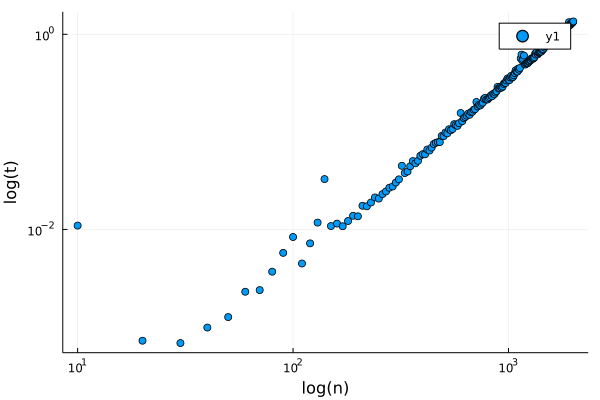

In [57]:
#plot(n_list, time);
plot(n_list, time, 
    seriestype = :scatter, 
    xlabel = "log(n)",
    xscale = :log,
    yscale = :log,
    ylabel = "log(t)")

In [58]:
using CurveFit

In [59]:
a1, a2 = power_fit(n_list, time)

(2.3864999079165025e-6, 1.7211689247560897)

In [60]:
xx = range(0,length=200,step=10)

0:10:1990

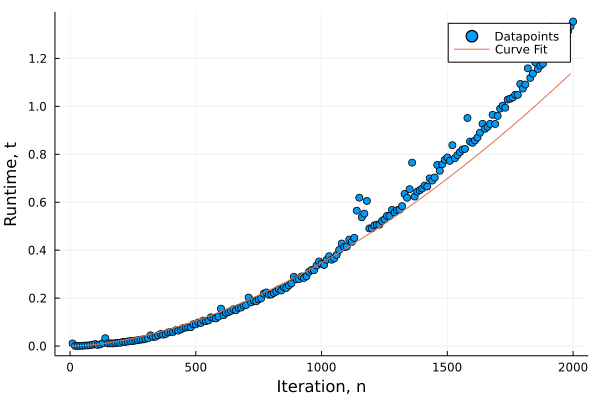

In [61]:
plot(n_list, time, 
    seriestype = :scatter, 
    xlabel = "Iteration, n",
    ylabel = "Runtime, t",
    label = "Datapoints");
plot!(xx, a1*xx.^a2, label = "Curve Fit")

In [62]:
a1*xx.^(a2)

200-element Vector{Float64}:
 0.0
 0.0001255828534436777
 0.0004140509835889415
 0.0008320254748456478
 0.0013651403221846498
 0.002004360324631464
 0.002743216583985335
 0.003576735552182713
 0.004500914556707222
 0.005512427626933944
 0.0066084448722333764
 0.007786514108927302
 0.009044479350885508
 ⋮
 1.0307187271990128
 1.0401732058116082
 1.0496638289820508
 1.0591905435657598
 1.0687532967746596
 1.0783520361729397
 1.0879867096728884
 1.097657265530796
 1.1073636523429262
 1.1171058190415577
 1.1268837148910884
 1.136697289484207

As we can see from the log-log plot of the runtime vs iteration of the Mandelbrot, the computational complexity closely ressembles a power law. By a using the `CurveFit` package, we can extract the coefficients of this fuction.

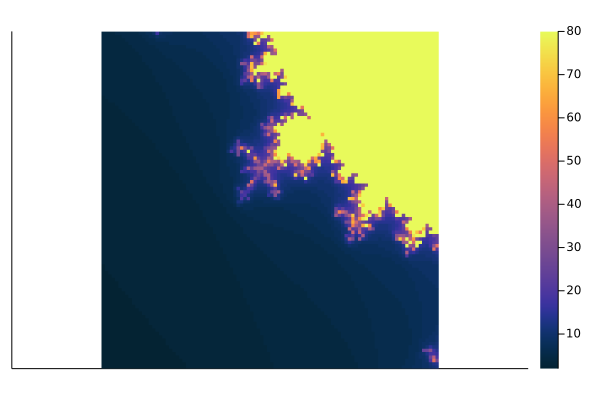

In [69]:
plotMandelbrot( (-0.95,-0.3); n=100 )

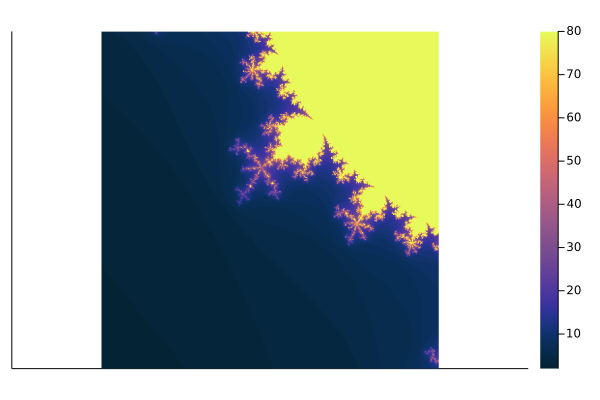

In [67]:
plotMandelbrot( (-0.95,-0.3); n=500 )

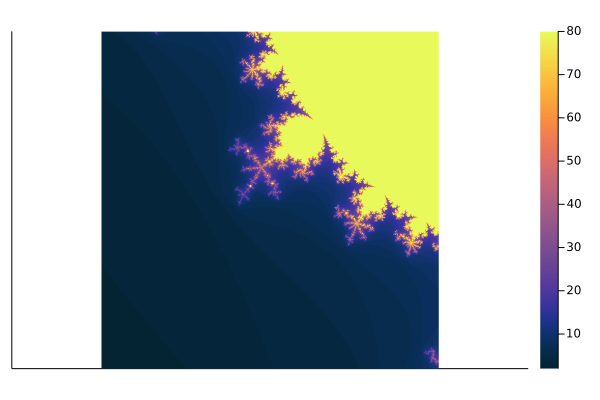

In [68]:
plotMandelbrot( (-0.95,-0.3); n=1_000 )

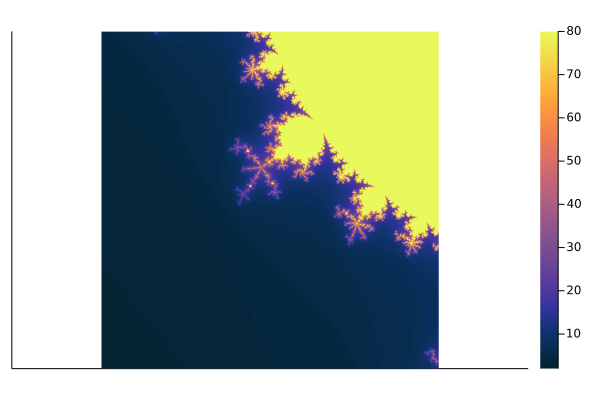

In [70]:
plotMandelbrot( (-0.95,-0.3); n=5_000 )

Visualizing `n=100`, `n=500`, `n=1000` and `n=5000`, there were no visible difference on the plots hence we can argue that it is impractical to use such large `n` values since the drawback is the runtime. We can say that `n<1000` is sufficient enough for visualization purposes.